In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Reading Train and Test Data



In [884]:
train=pd.read_csv("C:/Users/shreyas.raghavan/Desktop/train.csv",encoding='latin')
Test_df=pd.read_csv("C:/Users/shreyas.raghavan/Desktop/test.csv",encoding='latin')
train.shape

(612, 154)

In [596]:
features=list(train)
features.remove('Last Name')
features.remove('First Name')
features.remove('Born')
features.remove('City')
#Y variable


In [597]:
df1=train[features]
df1.shape

(612, 150)

# Missing Value and outlier Treatment

In [598]:
def missing(df1):
    missing_df=pd.DataFrame({'Features':list(df1.columns),'Missing perc':list(df1.isnull().sum()/df1.shape[0]*100),'Missing Count':list(df1.isnull().sum())})
    missing_l=list(missing_df[(missing_df['Missing perc']>0) & (missing_df['Missing perc']<50)]['Features'])
#     df[missing_l].fillna(df[missing_l].mode()[0],inplace=True)
    for i in missing_l:
        df1[i]=df1[i].fillna(df1[i].mode()[0])
    drop_l=list(missing_df[missing_df['Missing perc']>=50]['Features'])
    for i in drop_l:
        del df1[i]
    return df1

In [599]:
df1=missing(df1)
df1.shape

C:\Users\shreyas.raghavan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(612, 150)

In [600]:
cat=list(df1.describe(include=['O']).columns)
cont=list(df1.describe().columns)


In [601]:
def remove_variance_cont(df,cont_l):
    p1=[]
    p95=[]
    col_name=[]
    # Finding p1 and p99
    for i in cont_l:
        try:
            p1.append(int(data_df[i].quantile(0.01)))
            p95.append(int(data_df[i].quantile(0.95)))
            col_name.append(i)
        except:
            pass
    quan_df=pd.DataFrame()
    quan_df=pd.DataFrame({'col_name':col_name,'p1':p1,'p95':p95})
    var_l=list(quan_df[quan_df['p1']==quan_df['p95']]['col_name'])
    model_l1=list(set(cont_l)-set(var_l))
    return df[model_l1]

In [1146]:
t_df=remove_variance_cont(df1,cont)
merge= pd.concat([t_df,df1[cat]],axis=1)
merge.shape

(612, 51)

# Removing Variables With Coorelation and VIF checks


In [1147]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return(dataset)

In [1148]:
new_dat=correlation(merge,0.75)
#new_dat.append(correlation(final_df1[feat1],0.70))
new_dat.shape

(612, 51)

In [605]:
cont_l=list(new_dat.describe().columns)
cat_l=list(new_dat.describe(include=['O']).columns)

In [606]:
 def calculate_vif(thresh,X,train,y):
        datecol=[x for x in train.columns if train[x].dtypes=='datetime64[ns]']
        cat=[x for x in train.columns if train[x].dtypes == 'object' and x not in datecol]
        X1=[x for x in train.columns if train[x].dtypes != 'object' and x not in datecol and x not in y]    
        X=[x for x in X1 if x not in cat]
        X=train[X]
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif=')
                print(max_vif)
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        print(X)
        return X

In [607]:
vif_df=calculate_vif(thresh=10,train=new_dat,X=cont_l,y=train['Salary'])

Dropping PDO with vif=
4926353.47059
Dropping DftYr with vif=
5561.91585801
Dropping Ht with vif=
2181.50565466
Dropping SV% with vif=
452.959616758
Dropping Pace with vif=
126.048198481
Dropping Min with vif=
84.0456473112
Dropping Wt with vif=
42.0036173354
Dropping Pct% with vif=
25.1553706302
Dropping SCF with vif=
20.8312533735
Dropping iHF.1 with vif=
14.8528501483
Dropping sDist.1 with vif=
13.9374061809
     Game  BLK%  FOW.Up  S.Bkhd  iPenDf  Match   A/60  G.Snap   IPP%  CBar   \
0       0   0.0       0       0       0      0  16.74       0    0.0      0   
1       0   8.0       0       2      -4      0   2.79       0   30.4      0   
2       0   2.4      13      19      -2      0   1.95       3   63.4      0   
3       0   7.3       0       0       1      0   3.45       0   37.5      0   
4       1   4.4       3       7     -11      0   2.32       0   61.3      0   
5       0   6.5       0       2      -1      0   1.91       0   23.9      0   
6       0   4.3       0       0 

In [609]:
final_df1=pd.concat([new_dat[cat_l],vif_df],axis=1)
feat1=list(final_df1.columns)
final_df1.columns

Index(['Pr/St', 'Cntry', 'Nat', 'Hand', 'Position', 'Team', 'Game', 'BLK%',
       'FOW.Up', 'S.Bkhd', 'iPenDf', 'Match', 'A/60', 'G.Snap', 'IPP%',
       'CBar ', 'S.Wrap', 'PSA', 'Post', 'G.Dflct', 'G.Bkhd', 'S.Dflct',
       'iHDf', 'DAP', 'SH%', 'Ovrl', 'Misc', 'G.Tip', 'Salary', 'S.Slap',
       '+/-', 'iPenD', 'ENG', 'G.Wrap', 'G.Slap', 'FO%', 'PSG', 'E+/-', 'Diff',
       'OTG'],
      dtype='object')

# Encoding Categorical Variables 

In [1149]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in final_df1.columns:
        if final_df1[column_name].dtype == object:
            final_df1[column_name] = le.fit_transform(final_df1[column_name])
        else:
            pass
features=list(final_df1.columns)


In [1150]:
Mod=final_df1[features]

# Addition and Removal of features accodring to the context

In [ ]:
 concat_df=pd.concat([Mod,df1[['G','DftYr','FOL','TOI','xGF']]],axis=1)
cols=list(concat_df.columns)
cols.remove('Salary')


In [1152]:
#cols.remove('Cntry')
cols.remove('Game')
#cols.remove('PSA')
cols.remove('Pr/St')
#cols.remove('OTG')
#cols.remove('FOW.Up')
cols.remove('Nat')
cols.remove('IPP%')
cols.remove('Team')
cols.remove('CBar ')
#cols.remove('A/60')
cols.remove('SH%')
cols.remove('Diff')
#cols.remove('BLK%')
cols.remove('FO%')
#cols.remove('Position')
cols

['Cntry',
 'Hand',
 'Position',
 'BLK%',
 'FOW.Up',
 'S.Bkhd',
 'iPenDf',
 'Match',
 'A/60',
 'G.Snap',
 'S.Wrap',
 'PSA',
 'Post',
 'G.Dflct',
 'G.Bkhd',
 'S.Dflct',
 'iHDf',
 'DAP',
 'Ovrl',
 'Misc',
 'G.Tip',
 'S.Slap',
 '+/-',
 'iPenD',
 'ENG',
 'G.Wrap',
 'G.Slap',
 'PSG',
 'E+/-',
 'OTG',
 'G',
 'DftYr',
 'FOL',
 'TOI',
 'xGF']

# Regression Stats


In [1165]:
import statsmodels.api as sm

In [1174]:
model1=sm.OLS(concat_df['Salary'],concat_df[cols])#without PCA



In [1178]:
result1=model1.fit()


In [1204]:
##Getting the top Influential Plots
from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(result)
test_class.dfbetas[:5,:]

array([[ -6.74747765e-02,  -5.71526358e-02,  -1.54920786e-02,
         -6.25223575e-02,   2.11887169e-01,   1.29871266e-02,
          2.80916121e-02,  -1.65019726e-01,  -2.03946599e-02,
          4.82456733e-02,  -5.59109072e-02,   1.31447635e-01,
          5.30510915e-01,  -5.64102292e-02,  -1.15375018e-01,
         -1.10366702e-01,  -7.26043400e-03,  -1.50328219e-01,
          1.14516238e-01,  -2.16901990e-03,  -1.53315534e-02,
          1.63771593e-03,  -6.16297461e-03,   3.92101231e-02,
         -6.94055479e-03,   4.54091628e-02],
       [ -4.15687203e-03,   6.44527099e-02,   1.12354433e-02,
          1.18337798e-02,   5.67309047e-02,  -1.86574235e-02,
         -1.84540970e-02,   3.10124709e-02,   3.07635389e-02,
          3.45594786e-02,   7.20112728e-03,  -6.24217818e-02,
         -1.03552347e-03,  -5.49994241e-03,  -1.00109213e-02,
          4.97454616e-02,  -4.48823339e-02,  -9.11076687e-04,
          4.24274648e-02,  -2.43504715e-02,  -1.60113157e-02,
          1.05786776e-02,

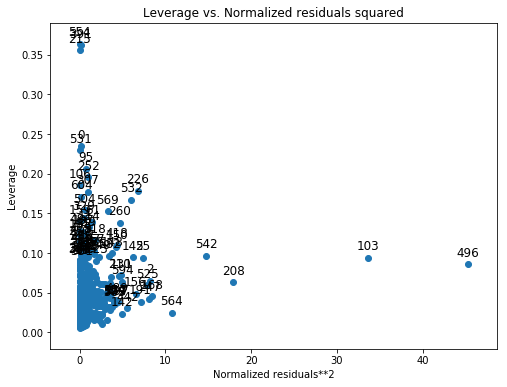

In [1206]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(result, ax = ax)
fig

In [1179]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     53.67
Date:                Sun, 23 Dec 2018   Prob (F-statistic):          3.27e-157
Time:                        15:42:37   Log-Likelihood:                -9588.6
No. Observations:                 612   AIC:                         1.925e+04
Df Residuals:                     577   BIC:                         1.940e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cntry       1262.4902   9159.872      0.138      0.8

In [1203]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sm.stats.diagnostic.het_breuschpagan( result.resid, result.model.exog)
print(name, test)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (21.661721204148925, 0.65519455167588558, 0.82702051984913305, 0.71321490282267452)


# Regression Model


In [1181]:
trainX, testX, trainY, testY =  train_test_split(concat_df[cols], concat_df['Salary'], test_size = .3)
lr=LinearRegression()
lr.fit(concat_df[cols],concat_df['Salary'])
preds=(lr.predict(testX.values))
r_squared=r2_score(y_pred=(preds),y_true=(testY))
adjusted_r_squared = 1 - (1-r_squared)*(len(testY)-1)/(len(testY)-testX.shape[1]-1)
print(sqrt(mean_squared_error(testY,preds)),r2_score(testY,preds),adjusted_r_squared)   
trainX.shape

1440947.0503841855 0.630436206892 0.543039363928


(428, 35)

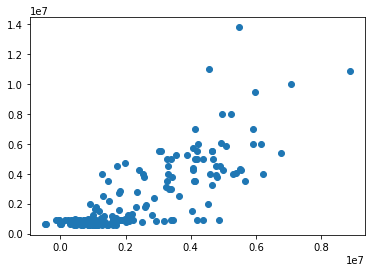

In [1182]:
plt.scatter(y=(testY),x=(preds))
plt.show()

In [1158]:
from sklearn import metrics 
l=metrics.mean_squared_error(y_pred=preds,y_true=testY)
print(sqrt(l))

1602158.521279669


# Predicting for the Test set 

In [1159]:
Test_df=missing(Test_df)
train=missing(train)

In [1160]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in Test_df.columns:
        if Test_df[column_name].dtype == object:
            Test_df[column_name] = le.fit_transform(Test_df[column_name])
        else:
            pass
for column_name in train.columns:
        if train[column_name].dtype == object:
            train[column_name] = le.fit_transform(train[column_name])
        else:
            pass


In [1184]:
#trainX, testX, trainY, testY =  train_test_split(concat_df[cols], concat_df['Salary'], test_size = .3)
lr=LinearRegression()
lr.fit(train[cols],train['Salary'])
preds=(lr.predict(Test_df[cols].values))
pred=pd.DataFrame(pre

In [1186]:
Test=pd.read_csv("C:/Users/shreyas.raghavan/Desktop/Test_salary.csv",encoding='latin')

In [1187]:
r_squared=r2_score(y_pred=(pred),y_true=(Test['Salary']))
adjusted_r_squared = 1 - (1-r_squared)*(len(Test['Salary'])-1)/(len(Test['Salary'])-testX.shape[1]-1)
print(sqrt(mean_squared_error(Test['Salary'],pred)),r2_score(Test['Salary'],pred),adjusted_r_squared)   
trainX.shape

1680819.454731956 0.521800700522 0.447743286886


(428, 35)